# An√°lise PISA e modelo de clusteriza√ß√£o

**Pacotes python**

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import  KMeans
import folium
from folium.plugins import HeatMap


**Dataset**

In [93]:
FILE = 'Indice educacao.xlsx'
df = pd.read_excel(FILE)

**Explorando os dados**

In [94]:
display(df.head(10))
display(df.columns)
display(df.info())
display(df.isnull().sum)

Posi√ß√£o    Pa√≠s / Economia  Pontua√ß√£o PISA (2022) IDH (√∫ltimos dados)  \
0        1          Singapura                    575               0.939   
1        2      Macau (China)                    552               0.914   
2        3             Taiwan                    547                N/A*   
3        4  Hong Kong (China)                    540               0.952   
4        5              Jap√£o                    536               0.925   
5        6      Coreia do Sul                    527               0.925   
6        7            Est√¥nia                    510               0.892   
7        8              Su√≠√ßa                    508                0.97   
8        9             Canad√°                    497               0.929   
9       10      Pa√≠ses Baixos                    493               0.944   

   PIB (em bilh√µes de USD)        Continente  
0                   547.39              √Åsia  
1                    25.40              √Åsia  
2                   759.00              √Åsia  
3                   407.11              √Åsia  
4                  4026.21              √Åsia  
5                  1712.79              √Åsia  
6                    42.91            Europa  
7                   936.56            Europa  
8                  2241.25  Am√©rica do Norte  
9                  1088.27            Europa

Index(['Posi√ß√£o', 'Pa√≠s / Economia', 'Pontua√ß√£o PISA (2022)',
       'IDH (√∫ltimos dados)', 'PIB (em bilh√µes de USD)', 'Continente'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Posi√ß√£o                  20 non-null     int64  
 1   Pa√≠s / Economia          20 non-null     object 
 2   Pontua√ß√£o PISA (2022)    20 non-null     int64  
 3   IDH (√∫ltimos dados)      20 non-null     object 
 4   PIB (em bilh√µes de USD)  20 non-null     float64
 5   Continente               20 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ KB


None

<bound method DataFrame.sum of     Posi√ß√£o  Pa√≠s / Economia  Pontua√ß√£o PISA (2022)  IDH (√∫ltimos dados)  \
0     False            False                  False                False   
1     False            False                  False                False   
2     False            False                  False                False   
3     False            False                  False                False   
4     False            False                  False                False   
5     False            False                  False                False   
6     False            False                  False                False   
7     False            False                  False                False   
8     False            False                  False                False   
9     False            False                  False                False   
10    False            False                  False                False   
11    False            False                  False                False   
12    False            False                  False                False   
13    False            False                  False                False   
14    False            False                  False                False   
15    False            False                  False                False   
16    False            False                  False                False   
17    False            False                  False                False   
18    False            False                  False                False   
19    False            False                  False                False   

    PIB (em bilh√µes de USD)  Continente  
0                     False       False  
1                     False       False  
2                     False       False  
3                     False       False  
4                     False       False  
5                     False       False  
6                     False       False  
7                     False       False  
8                     False       False  
9                     False       False  
10                    False       False  
11                    False       False  
12                    False       False  
13                    False       False  
14                    False       False  
15                    False       False  
16                    False       False  
17                    False       False  
18                    False       False  
19                    False       False  >

**Tratamento**

In [95]:
df['IDH (√∫ltimos dados)'] = pd.to_numeric(df['IDH (√∫ltimos dados)'], errors='coerce')

In [96]:
df['IDH (√∫ltimos dados)'].fillna(df['IDH (√∫ltimos dados)'].median(), inplace=True)

/tmp/ipython-input-3693468995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IDH (√∫ltimos dados)'].fillna(df['IDH (√∫ltimos dados)'].median(), inplace=True)


In [97]:
df = df.drop('Posi√ß√£o', axis=1)

In [98]:
df.columns = ['pais','pisa','idh','pib','continente']

**Pr√©-processamento**

- Selecionando as colunas

In [99]:
col_num = ['pib','idh','pisa']
col_str = ['pais','continente']

- Criando o pre-processamento

In [100]:
ct = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), col_str),
        ('num', StandardScaler(), col_num)
    ]
)

data = ct.fit_transform(df[col_str + col_num])

##Aplicando o metodo do cotovelo**

- Numero de clusters

In [101]:
K = range(1, 10)
wcss = []

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=50, n_init=10)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)


**Visualizando os clusters**

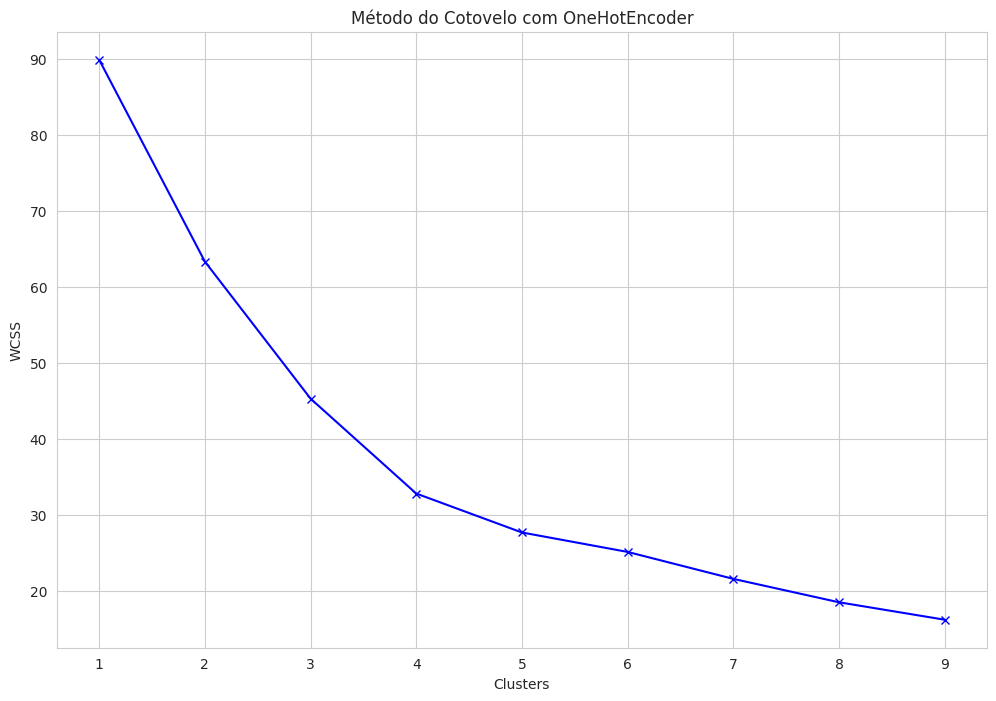

In [102]:
plt.figure(figsize=(12,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('M√©todo do Cotovelo com OneHotEncoder')
plt.show();



# üìä Conclus√£o do Agrupamento
> O n√∫mero de clusters ideal para o modelo K-Means est√° entre 3 a 4.

**Modelo final com 4 clusters**

In [103]:
model = KMeans(n_clusters=4, random_state=50, n_init=10)
df['cluster'] = model.fit_predict(data) + 1



##Cluster para cada continente**

In [76]:
continent_cluster = df.groupby(['continente'])['cluster'].value_counts()
display(continent_cluster)

continente        cluster
Am√©rica do Norte  4          1
Europa            3          6
                  1          5
                  4          1
Oceania           3          1
√Åsia              2          5
                  4          1
Name: count, dtype: int64

  > Grupo 2 (Exclusivamente √Åsia): Este grupo de pa√≠ses asi√°ticos se destaca por ter um perfil √∫nico. Eles n√£o se assemelham a nenhum outro grupo e formam sua pr√≥pria categoria, indicando um modelo de sucesso em que a alta pontua√ß√£o no PISA est√° alinhada a outros fatores de desenvolvimento, diferenciando-os do restante do mundo.



  > Grupos 3 e 4 (Mistos): Esses grupos mostram que a performance de pa√≠ses da Europa, √Åsia, Am√©rica do Norte e Oceania se misturam. Isso sugere que o n√≠vel de desenvolvimento educacional e social transcende as fronteiras continentais, formando um "clube" de na√ß√µes de alto desempenho, independentemente de onde estejam localizadas.



**M√©dia do PISA para cada cluster**

In [77]:
mean_cluster = df.groupby('cluster')['pisa'].mean().sort_values(ascending=False)
display(mean_cluster )

cluster
2    548.200000
4    507.333333
1    491.800000
3    491.571429
Name: pisa, dtype: float64

# üí° Conclus√£o do Agrupamento
>Grupo 2 (Principalmente Asi√°tico): Este cluster se destaca com a maior m√©dia de Pontua√ß√£o PISA. Esse resultado mostra que a maioria dos pa√≠ses asi√°ticos neste grupo apresenta um desempenho educacional superior, o que os diferencia do restante.
>Grupos 1, 3 e 4 (Principalmente Ocidentais): Juntos, esses grupos s√£o formados majoritariamente por pa√≠ses ocidentais da Europa, Oceania e Am√©rica do Norte. Suas m√©dias de Pontua√ß√£o PISA s√£o inferiores √† do Grupo 2, indicando que, embora tenham bom desempenho, eles n√£o atingem o mesmo n√≠vel de excel√™ncia educacional.




**IDH e PIB dos clusters**

In [78]:
cluster_idh = df.groupby('cluster')['idh'].mean().sort_values(ascending=False)
cluster_pib = df.groupby('cluster')['pib'].mean().sort_values(ascending=False)

In [79]:
display(cluster_idh)
display(cluster_pib)

cluster
3    0.942429
2    0.931400
4    0.928667
1    0.870200
Name: idh, dtype: float64

cluster
4    3303.763333
3     767.518571
2     690.338000
1     438.924000
Name: pib, dtype: float64

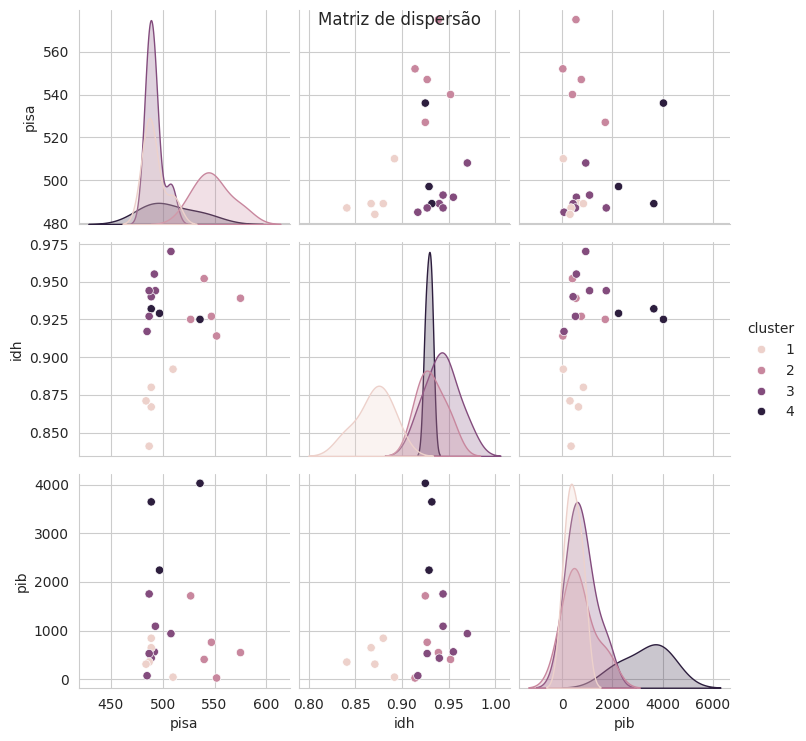

In [80]:
sns.set_style('whitegrid')
fig = sns.pairplot(data=df, hue='cluster')
fig.fig.suptitle('Matriz de dispers√£o')
plt.show()

‚≠ê O Cluster 2, formado principalmente por pa√≠ses asi√°ticos, apresenta um desempenho equilibrado em IDH e PIB, destacando-se por ser o primeiro em Pontua√ß√£o PISA. Em contraste, os Clusters 1, 3 e 4, compostos por pa√≠ses ocidentais da Europa, Am√©rica do Norte e Oceania, t√™m um desempenho inferior no PISA, mas se sobressaem com resultados superiores em IDH e PIB.

In [115]:
df['pais'].values

array(['Singapura', 'Macau (China)', 'Taiwan', 'Hong Kong (China)',
       'Jap√£o', 'Coreia do Sul', 'Est√¥nia', 'Su√≠√ßa', 'Canad√°',
       'Pa√≠ses Baixos', 'Irlanda', 'B√©lgica', 'Dinamarca', 'Reino Unido',
       'Pol√¥nia', 'Austr√°lia', '√Åustria', 'Rep√∫blica Tcheca', 'Eslov√™nia',
       'Finl√¢ndia'], dtype=object)

**Adicionando cordenadas**

In [116]:
lat = {
    "Singapura": 1.3521,
    "Macau (China)": 22.1987,
    "Taiwan": 23.6978,
    "Hong Kong (China)": 22.3193,
    "Jap√£o": 36.2048,
    "Coreia do Sul": 35.9078,
    "Est√¥nia": 58.5953,
    "Su√≠√ßa": 46.8182,
    "Canad√°": 56.1304,
    "Pa√≠ses Baixos": 52.1326,
    "Irlanda": 53.3331,
    "B√©lgica": 50.8503,
    "Dinamarca": 56.2639,
    "Reino Unido": 55.3781,
    "Pol√¥nia": 51.9194,
    "Austr√°lia": -25.2744,
    "√Åustria": 47.5162,
    "Rep√∫blica Tcheca": 49.8175,
    "Eslov√™nia": 46.1512,
    "Finl√¢ndia": 61.9241
}

lng = {
    "Singapura": 103.8198,
    "Macau (China)": 113.5439,
    "Taiwan": 120.9605,
    "Hong Kong (China)": 114.1694,
    "Jap√£o": 138.2529,
    "Coreia do Sul": 127.7669,
    "Est√¥nia": 25.0136,
    "Su√≠√ßa": 8.2275,
    "Canad√°": -106.3468,
    "Pa√≠ses Baixos": 5.2913,
    "Irlanda": -6.2489,
    "B√©lgica": 4.3517,
    "Dinamarca": 9.5018,
    "Reino Unido": -3.4360,
    "Pol√¥nia": 19.1451,
    "Austr√°lia": 133.7751,
    "√Åustria": 14.5501,
    "Rep√∫blica Tcheca": 15.4730,
    "Eslov√™nia": 14.9955,
    "Finl√¢ndia": 25.7482
}

df['lat'] = df['pais'].map(lat)
df['lng'] = df['pais'].map(lng)

In [122]:
df.to_csv('global_pisa.csv', index=False)

for column in df

##Mapa dos clusters**

In [120]:

cluster_colors = {
    1: 'blue',
    2: 'green',
    3: 'red',
    4: 'purple'
}

center_lat = df['lat'].mean()
center_lng = df['lng'].mean()

m = folium.Map(location=[center_lat, center_lng], zoom_start=2)

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=12,
        color=cluster_colors.get(row['cluster']),
        fill=True,
        fill_color=cluster_colors.get(row['cluster']),
        fill_opacity=0.7,
        tooltip=f"<b>Country:</b> {row['pais']}<br>"
                f"<b>Continent:</b> {row['continente']}<br>"
                f"<b>Cluster:</b> {row['cluster']}"
    ).add_to(m)

m

# Mapa de calor

In [119]:


center_lat = df['lat'].mean()
center_lng = df['lng'].mean()

m = folium.Map(location=[center_lat, center_lng], zoom_start=2)

for column in ['idh', 'pib', 'pisa']:
    layer = folium.FeatureGroup(name=f"HeatMap - {column.upper()}")

    heat_data = [
        [row['lat'], row['lng'], row[column]]
        for _, row in df.iterrows()
        if not pd.isnull(row[column])
    ]

    HeatMap(heat_data, radius=25, blur=15, max_zoom=6).add_to(layer)

    for _, row in df.iterrows():
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=f"{row['pais']}<br>{column.upper()}: {row[column]}",
            tooltip=row['pais'],
            icon=folium.Icon(color='green')
        ).add_to(layer)

    layer.add_to(m)

folium.LayerControl().add_to(m)

m